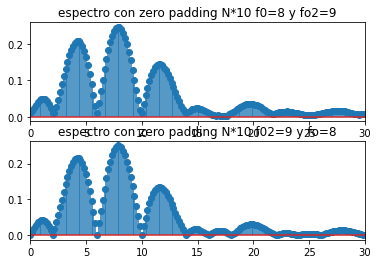

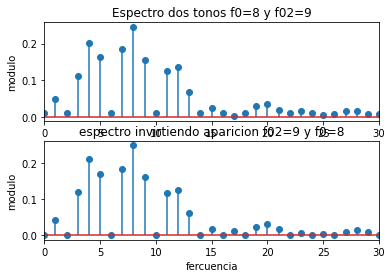

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

##############################################################################
def generador_senoidal (fs, f0, N, a0, p0):
   
    tt=np.arange(N/fs , step=1/fs)
    signal = a0 * np.sin( 2 * np.pi * f0 * tt + p0 )
     
    return tt, signal   

##############################################################################

N  = 1000         
fs = 1000        
df=fs/N                   

a0 = 1 # Volts
p0 = 0#np.pi/4  #radianes. 
Norma = N/2

Npad = N*5 #cantidad en q se incrementa el vector de la señal relenando con ceros. Zero padding

##############################################################################

#xx = señal con dos tonos de frecuencia con orden de aparicon fo2=9 - fo=8
#xx1 = señal xx con zero padding
#xx2 = señal de un tono con aparicion en su tercer ciclo fo=8

#xx3 = señal con dos tonos de frecuencia con orden de aparicion fo=8 - fo2=9
#xx5 = señal xx3 con zero padding
#xx4 = señal de un tono con aparicion en tercer ciclo f02=9

##############################################################################

f0 =8 * fs/N

tt , xx = generador_senoidal(fs , f0 , N , a0 , p0)
xx[:int(2*N/f0)] = 0
xx[int(3*N/f0):] = 0

f02 =9 * fs/N

tt , xx2 = generador_senoidal(fs , f0 , N , a0 , p0)
xx2[int(1*N/f02):] = 0
xx += xx2
xx1 = np.concatenate((xx,np.zeros(Npad)))


fftxx = fft(xx)
fftxx_abs = np.abs(fftxx)/(Norma)
freq = np.arange( 0 , fs , fs/N)

fftxx1 = fft(xx1)
fftxx1_abs = np.abs(fftxx1)/Norma



#############################################################################################

f0 =8 * fs/N
tt , xx3 = generador_senoidal(fs , f0 , N , a0 , p0)
xx3[int(1*N/f0):] = 0

f02 =9 * fs/N
tt , xx4 = generador_senoidal(fs , f0 , N , a0 , p0)
xx4[:int(2*N/f0)] = 0
xx4[int(3*N/f0):] = 0

xx3 += xx4
xx5 = np.concatenate((xx3,np.zeros(Npad)))

fftxx3 = fft(xx3)                    #Calculo FFT xx3 señal sin zero Padding
fftxx3_abs = np.abs(fftxx3)/(Norma)  # Valor absoluto normalizado
freq = np.arange( 0 , fs , fs/N)

fftxx5 = fft(xx5)                    #FFT de xx5 señal con zero padding
fftxx5_abs = np.abs(fftxx5)/Norma    # Valor absoluto normalizado




freq = np.fft.fftfreq(len(xx),1/N)  #fftfreq me da ntervalos de frecuencia en ciclos por unidad del espaciado de muestra (con cero al comienzo), 
                                    #su parametro es en este caso es la unidad del eje de muestreo de xx q esta en seg
                                    #por lo que fftfreq genera intervalos 1/seg = Hz
freq3 = np.fft.fftfreq(len(xx3),1/N)

freqxx1 = np.fft.fftfreq(len(xx1),1/N)
freqxx5 = np.fft.fftfreq(len(xx5),1/N) 

###########################################################################

plt.figure(2)
plt.subplot(2 , 1 , 1)
plt.stem(freqxx1 , fftxx1_abs , use_line_collection=True )
plt.xlim(0,30)
plt.title('espectro con zero padding N*10 f0=8 y fo2=9')

plt.subplot(2 , 1 , 2)
plt.stem(freqxx5 , fftxx5_abs , use_line_collection=True )
plt.xlim(0,30)
plt.title('espectro con zero padding N*10 f02=9 y fo=8')

plt.figure(1)
plt.subplot(211)
plt.stem(freq , fftxx_abs , use_line_collection = True)
plt.xlim(0, 30) 
plt.ylabel('modulo')
plt.title('Espectro dos tonos f0=8 y f02=9')

plt.subplot(212)
plt.stem(freq3 , fftxx3_abs , use_line_collection = True)
plt.xlim(0, 30)
plt.xlabel('fercuencia') 
plt.ylabel('modulo')
plt.title('espectro invirtiendo aparicion f02=9 y f0=8')



plt.show()
